# **Task \#3**: Machine Learning MC886/MO444
##**Unsupervised Learning and Dimension Reduction Techniques**##

In [5]:
print('Tobias Conran Zorzetto' + ' 166214')
print('Victor Costa Dominguite' + ' 245003')

Tobias Conran Zorzetto 166214
Victor Costa Dominguite 245003


## Objective:

Explore **Dimension Reduction Techniques** and **Unsupervised Algorithms** alternatives and come up with the best possible model for the problems. 

**Obs: In this work, you can use scikit-learn.**

## Dataset

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 70,000 handwritten digits, with each digit being a grayscale image of size 28x28 pixels. The digits range from 0 to 9 and are evenly distributed in the dataset.

Dataset Information:

- You should respect the following traininig/test split: 60,000 training examples, and 10,000 test examples.

- Each training and test example is assigned to what number is in the sample.

- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

- The data is available at: ([Link of the Dataset](https://drive.google.com/drive/folders/13_nDDMrdIq2pCQU8kAnUQWBefpOAB-71?usp=sharing)): ```digit_recognizer_train.csv``` + ```digit_recognizer_test.csv```


More information about the dataset: *Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998, doi: 10.1109/5.726791.https://ieeexplore.ieee.org/document/726791*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

## ------ Read Dataset ----- ##
df = pd.read_csv('digit_recognizer_train.csv')
df = df.sample(frac=1)
df.head(5)

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20   
21766      0    0    0    0    0    0    0    0    0    0  ...      0      0  \
26057      3    0    0    0    0    0    0    0    0    0  ...      0      0   
3980       2    0    0    0    0    0    0    0    0    0  ...      0      0   
51874      5    0    0    0    0    0    0    0    0    0  ...      0      0   
13520      4    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
21766      0      0      0      0      0      0      0      0  
26057      0      0      0      0      0      0      0      0  
3980       0      0      0      0      0      0      0      0  
51874      0      0      0      0      0      0      0      0  
13520      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

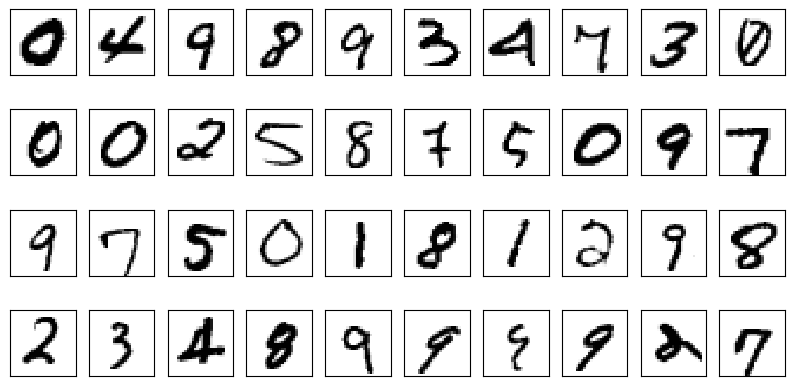

In [19]:
## ------ Plot Data ----- ##

fig, axes = plt.subplots(4, 10, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i][1:].values.reshape(28,28), cmap='binary', interpolation='nearest')

## 1. Dimensionality Reduction Techniques

Analyze the distribution by plotting th embeddings generated with the aid of dimensionality reduction techniques.

*Obs: Remember to normalize the data* and *test differents hyperparameters* 

(0.5 point) Plot a 2D graph using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) algorithm.

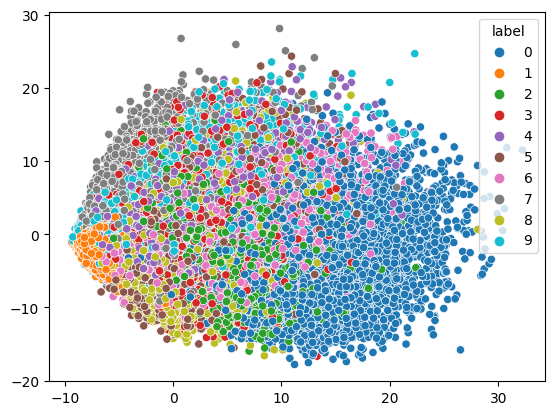

In [20]:
# Principal Component Analysis (PCA)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_norm = df[df.columns.drop(['label'])]
df_norm = scaler.fit_transform(df_norm)

pca = PCA(n_components=2, random_state=10)
reduced_df_pca = pca.fit_transform(df_norm)

sns.scatterplot(
    x=reduced_df_pca[:,0], 
    y=reduced_df_pca[:,1], 
    hue=df['label'], 
    palette=sns.color_palette()
    )

plt.show()

(0.5 point) Plot a 2D graph using the [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

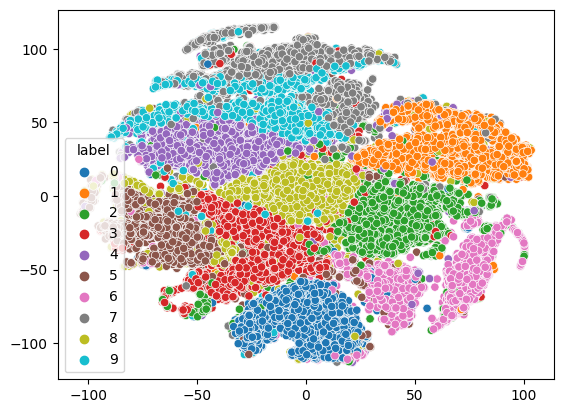

In [21]:
# T-distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1, init='random', random_state=10)
reduced_df_tsne = tsne.fit_transform(df_norm)

sns.scatterplot(
    x=reduced_df_tsne[:,0], 
    y=reduced_df_tsne[:,1], 
    hue=df['label'], 
    palette=sns.color_palette()
    )

plt.show()

(0.5 point) Plot a 2D graph using a combination of PCA + TSNE

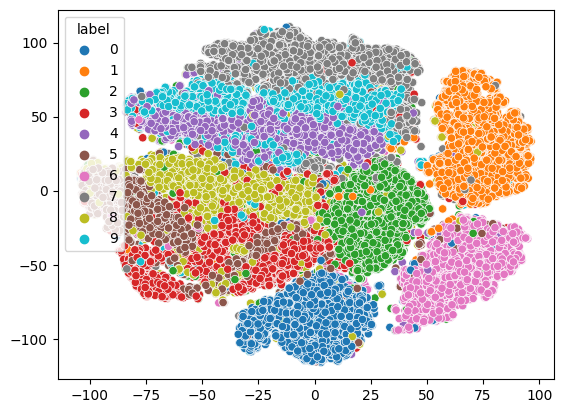

In [22]:
# PCA + t-SNE
from sklearn.manifold import TSNE
pca = PCA(n_components=15)
reduced_df = pca.fit_transform(df_norm)

tsne = TSNE(n_components=2, n_jobs=-1, init= 'random', random_state=10)
reduced_df_pca_tsne = tsne.fit_transform(reduced_df)

sns.scatterplot(
    x=reduced_df_pca_tsne[:,0], 
    y=reduced_df_pca_tsne[:,1], 
    hue=df['label'], 
    palette=sns.color_palette()
    )

plt.show()

(0.25 point) Plot a 3D graph using the best representation found.

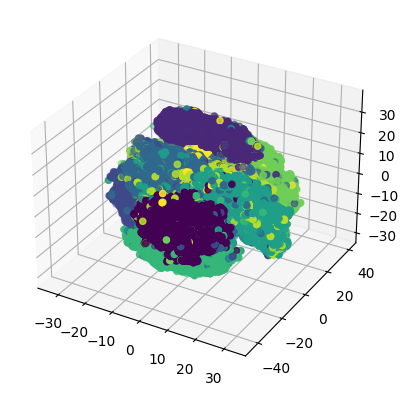

In [23]:
# 3D Graph with combination of PCA and TSNE

tsne3D = TSNE(n_components=3, n_jobs=-1, init='random', random_state=10)
# reduced_df is the PCA result for a reduction to 15 dimensions
reduced_df_pca_tsne3D = tsne3D.fit_transform(reduced_df)

plot_axis = plt.axes(projection = '3d')
plot_axis.scatter3D(reduced_df_pca_tsne3D[:,0], reduced_df_pca_tsne3D[:,1], reduced_df_pca_tsne3D[:,2], c = df['label'])

plt.show()

**(1.75 point) Questions:**
- What is the best representation, and why?
- Do the combination of techniques help improve the results?
- Did adding another dimension help enhance the performance?
- How can we use this knowledge to decide which model to train?

A melhor representação encontrada foi a obtida pela combinação dos métodos de redução de dimensionalidade t-SNE e PCA. Isso pois essa representação foi a que apresentou a melhor divisão entre as classes, ou seja, a melhor segmentação de pontos com mesmo rótulo, ao mesmo tempo que apresentou uma menor mistura de pontos de rótulos distintos, conforme pode ser observado nas figuras acima.

Dessa forma, observou-se que a combinação das técnicas de fato ajudou na obtenção de melhores resultados. Porém, quando comparadas isoladamente, contata-se que o desempenho do t-SNE é consideravelmente superior ao do PCA, sendo que nesse último há uma grande confusão na divisão de grupos distintos, resultando basicamente numa grande mistura e sobreposição de pontos de rótulos diferentes. Já o t-SNE apresenta uma divisão muito mais clara e precisa dos pontos, inclusive se aproximando do desempenho da representação obtida pela combinação dos dois métodos.

Quando a redução foi feita para 3 dimensões com a melhor representação obtida anteriormente para duas dimensões, o custo computacional foi muito maior, levando mais que o dobro do tempo para executar. Além disso, apesar de ser possível observar um agrupamento de pontos de mesmo rótulo, é dificil avaliar se tal modelo apresenta uma melhora na qualidade dos resultados em comparação com o modelo em 2 dimensões.

A partir dessa análise, pode ser decidido qual modelo ser utilizado para treinamento dos dados. Como a combinação entre PCA e t-SNE em 2 dimensões apresentou uma representação mais adequada dos dados, ou seja, com um maior discernimento entre os grupos de pontos de uma mesma classe, quando comparado aos outros modelos de 2 dimensões, além de ser mais simples que o modelo reduzido em 3 dimensões, essa foi a representção escolhida para treinar os dados.


(Optional) Additionally, you can visually explore the data and its distribution by plotting the original image in a 2D space.

In [24]:
def plot_images(best_embedding, images, width=2000, height=1000, max_dim=10):
  '''
    best_embedding : np.array
      Best representation found

    images : np.array
      Original Images  
  '''
  
  tx, ty = best_embedding[:, 0], best_embedding[:, 1]
  tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
  ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

  full_image = Image.new('RGBA', (width, height))

  for data, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.uint8(data.reshape(28,28)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

  plt.figure(figsize = (16,12))
  plt.imshow(full_image)
  plt.show()

In [25]:
## Plot the original images using two arrays: 
#    best_embedding with the components (n_components=2) from either PCA or t-SNE;
#    images with the original data. Both arrays should correspond to the same data.

#plot_images(best_embedding, df)

(Optional) Besides this algorithms, another popular algorithm is Uniform Manifold Approximation and Projection ([UMAP](https://umap-learn.readthedocs.io/en/latest/)). Plot a 2D graph using this technique.

Obs: *here is a great video that explains this method and the differences between it and t-SNE*. 

Link: https://www.youtube.com/watch?v=eN0wFzBA4Sc&ab_channel=StatQuestwithJoshStarmer.

In [26]:
!pip install umap-learn -q

In [27]:
# Uniform Manifold Approximation and Projection (UMAP)

## 2. Unsupervised Learning

The main idea of this section is to train an unsupervised learning algorithm to identify the possible groups present in the MNIST dataset. 

(0.25 point) Train a KMeans algorithm using the best representation found in the previous section and plot the resulting clusters. Compare with the original representation.

*Obs: Use ``` n_cluster = 10 ``` for the KMeans algorithm.*

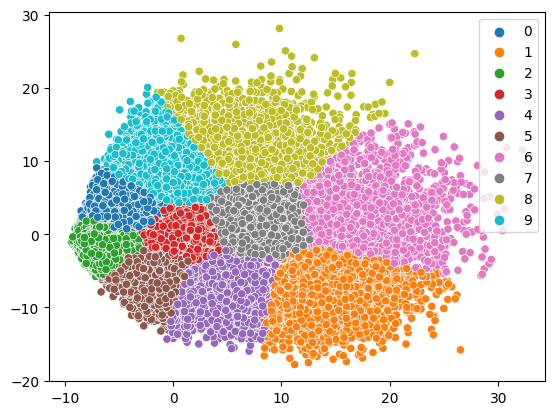

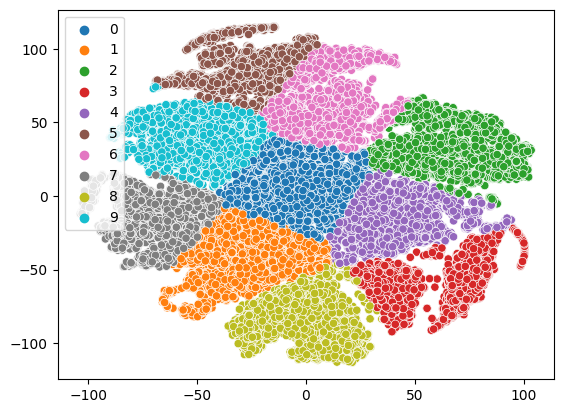

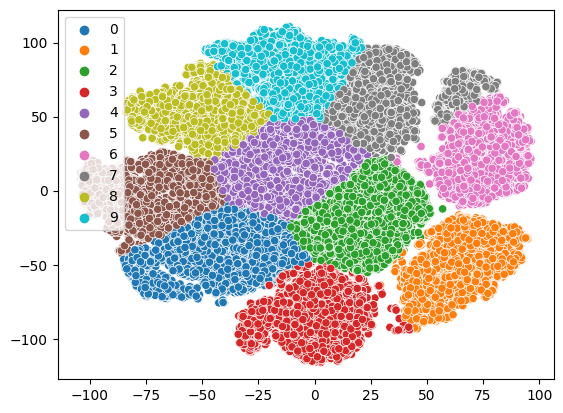

In [28]:
# KMeans with a dimension reduction technique.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=50, max_iter=300, init='random', random_state=10)
kmeans.fit(reduced_df_pca)

sns.scatterplot(
    x=reduced_df_pca[:,0], 
    y=reduced_df_pca[:,1], 
    hue=kmeans.labels_, 
    palette=sns.color_palette()
    )

plt.show()

kmeans.fit(reduced_df_tsne)

sns.scatterplot(
    x=reduced_df_tsne[:,0], 
    y=reduced_df_tsne[:,1], 
    hue=kmeans.labels_, 
    palette=sns.color_palette()
    )

plt.show()

kmeans.fit(reduced_df_pca_tsne)

sns.scatterplot(
    x=reduced_df_pca_tsne[:,0], 
    y=reduced_df_pca_tsne[:,1], 
    hue=kmeans.labels_, 
    palette=sns.color_palette()
    )

plt.show()


(0.5 points) Choose the best ```n_cluster``` using the Elbow Method. Plot the graph to assist.

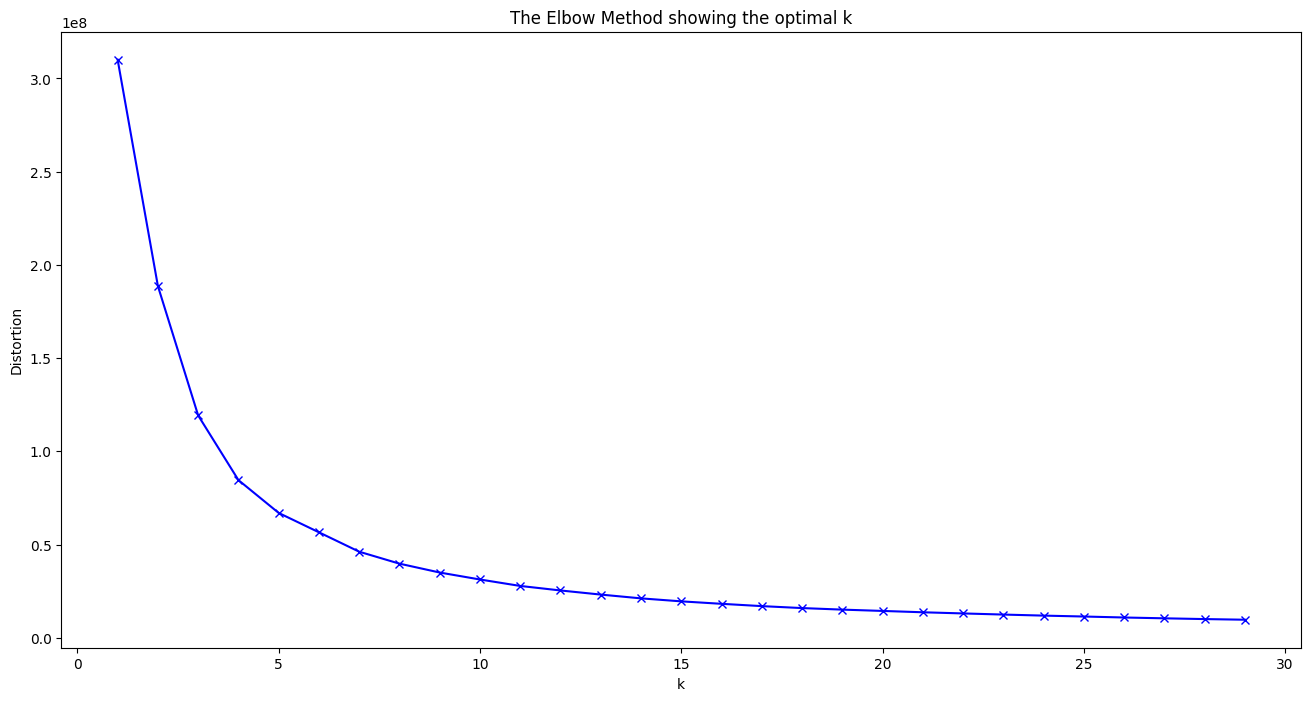

In [29]:
# Elbow Method and 2D plot

k_candidates = [k for k in range(2, 30)]
delta_max = 0
k_chosen = None
costs = []

kmeans = KMeans(n_clusters=1, n_init=50, max_iter=300, init='random', random_state=10)
kmeans.fit(reduced_df_pca_tsne)
costs.append(kmeans.inertia_)
for k in k_candidates:
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=300, init='random', random_state=10)
    kmeans.fit(reduced_df_pca_tsne)
    costs.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot([1] + k_candidates, costs, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

(0.5 points) Choose the best ```n_cluster``` using the Silhouette Analysis. Plot the silhouette and the average score.

For n_clusters = 5 The average silhouette_score is : 0.36920625
For n_clusters = 6 The average silhouette_score is : 0.38742423
For n_clusters = 7 The average silhouette_score is : 0.38853332
For n_clusters = 8 The average silhouette_score is : 0.3850319
For n_clusters = 9 The average silhouette_score is : 0.36245617
For n_clusters = 10 The average silhouette_score is : 0.37591997
For n_clusters = 11 The average silhouette_score is : 0.39730933
For n_clusters = 12 The average silhouette_score is : 0.39304417
For n_clusters = 13 The average silhouette_score is : 0.3922424


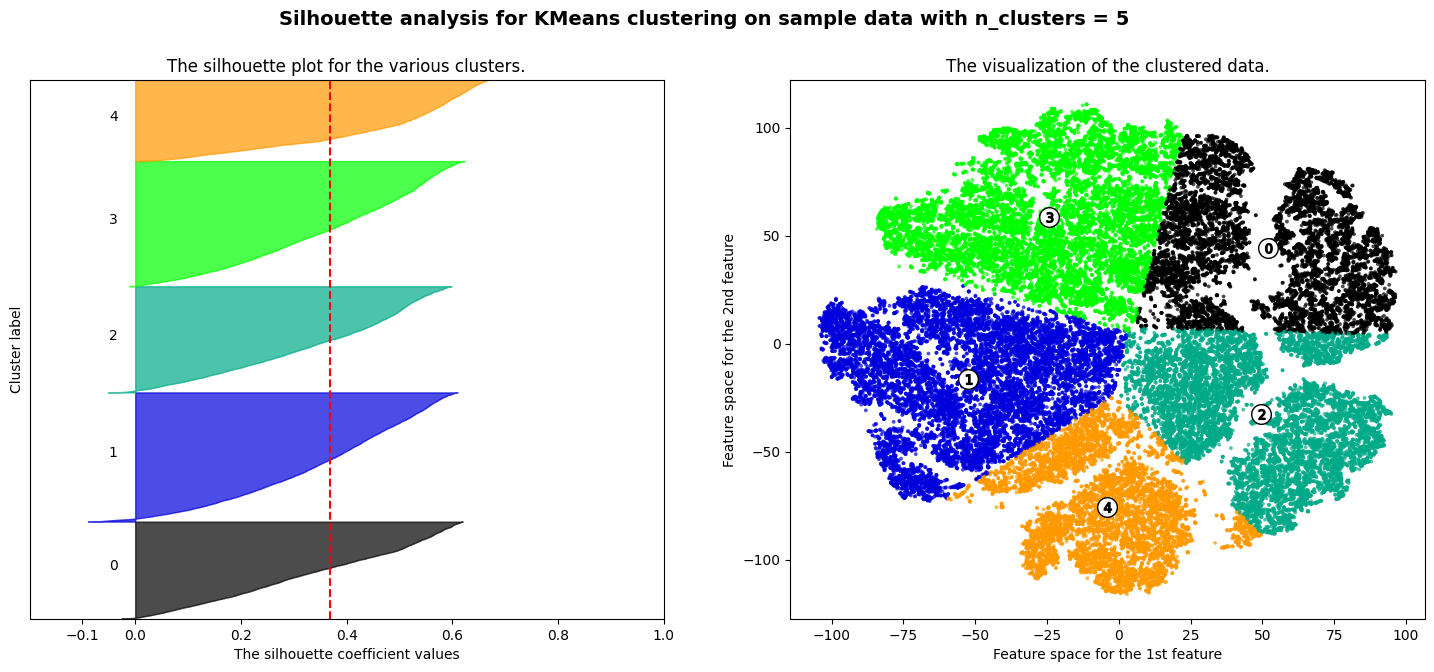

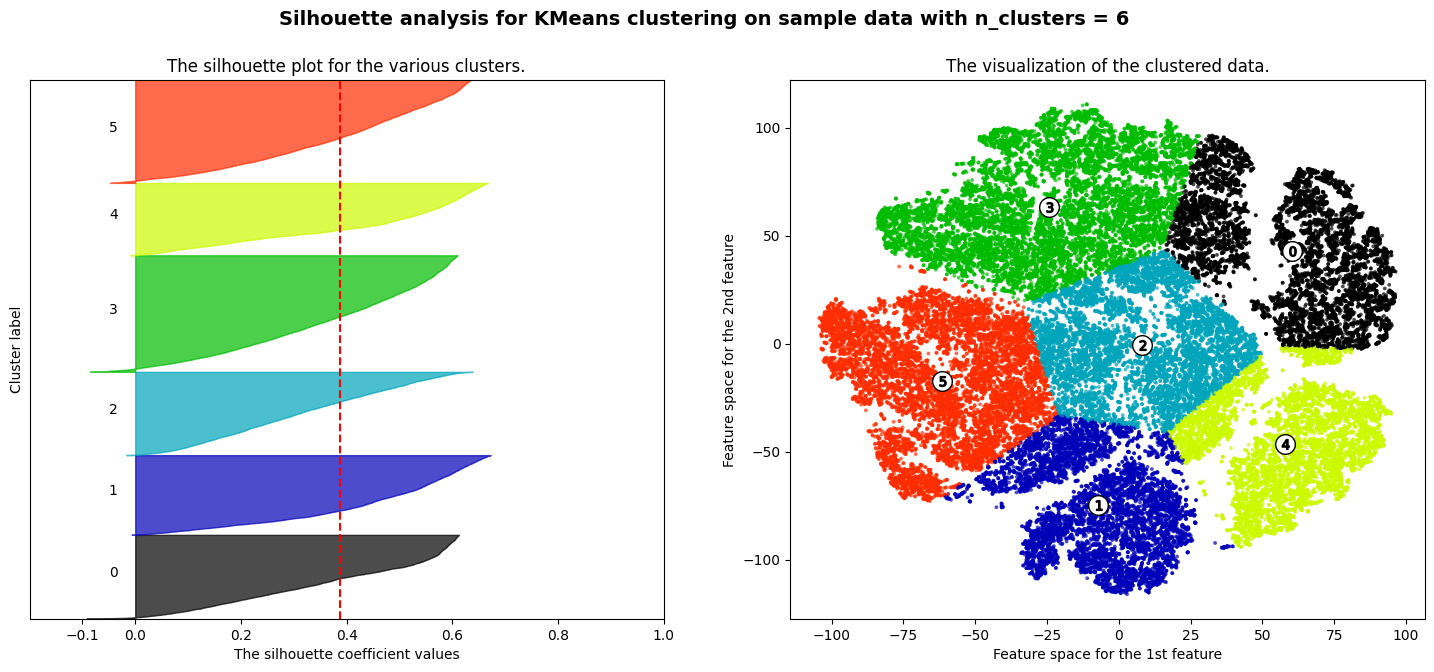

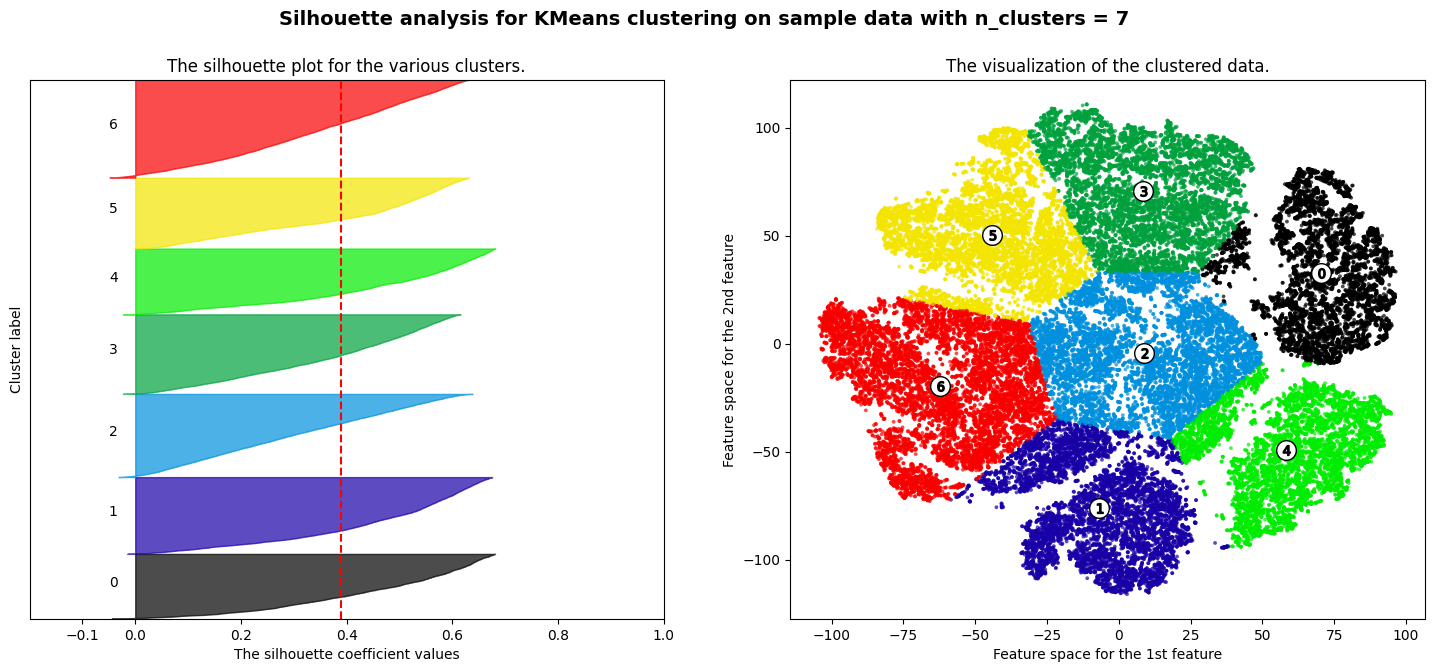

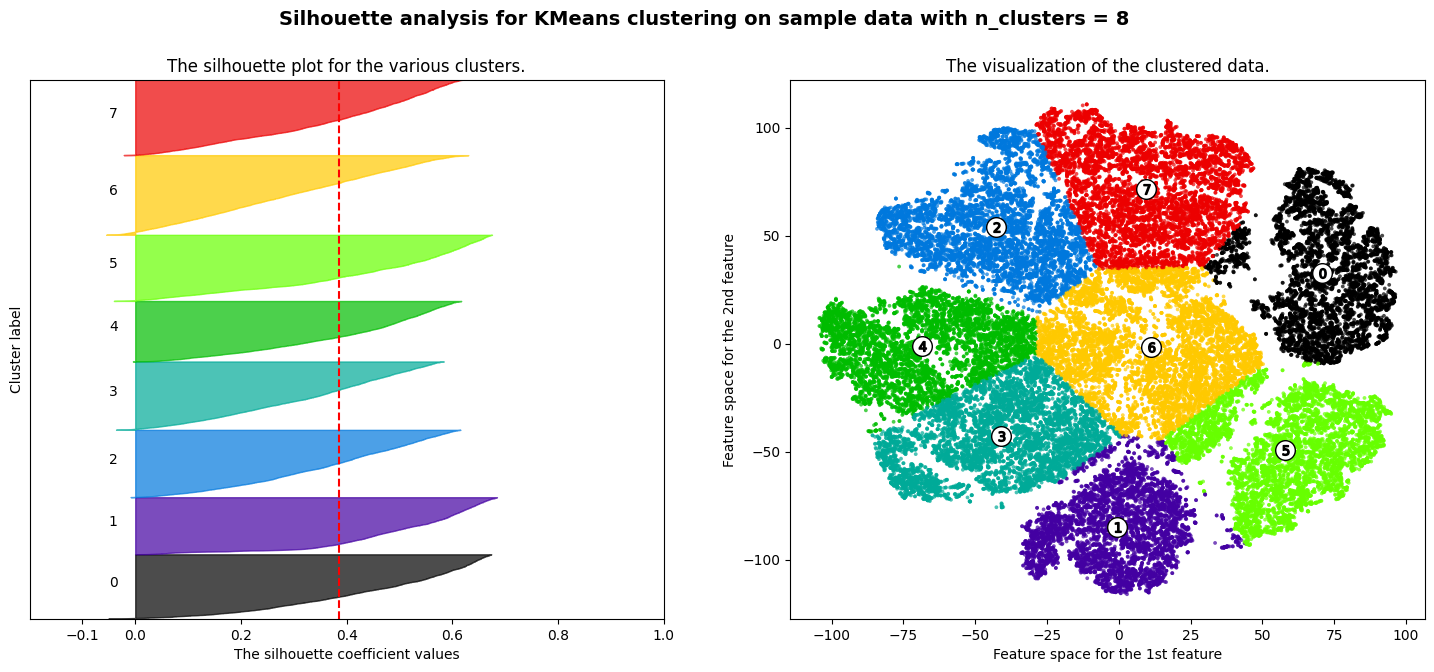

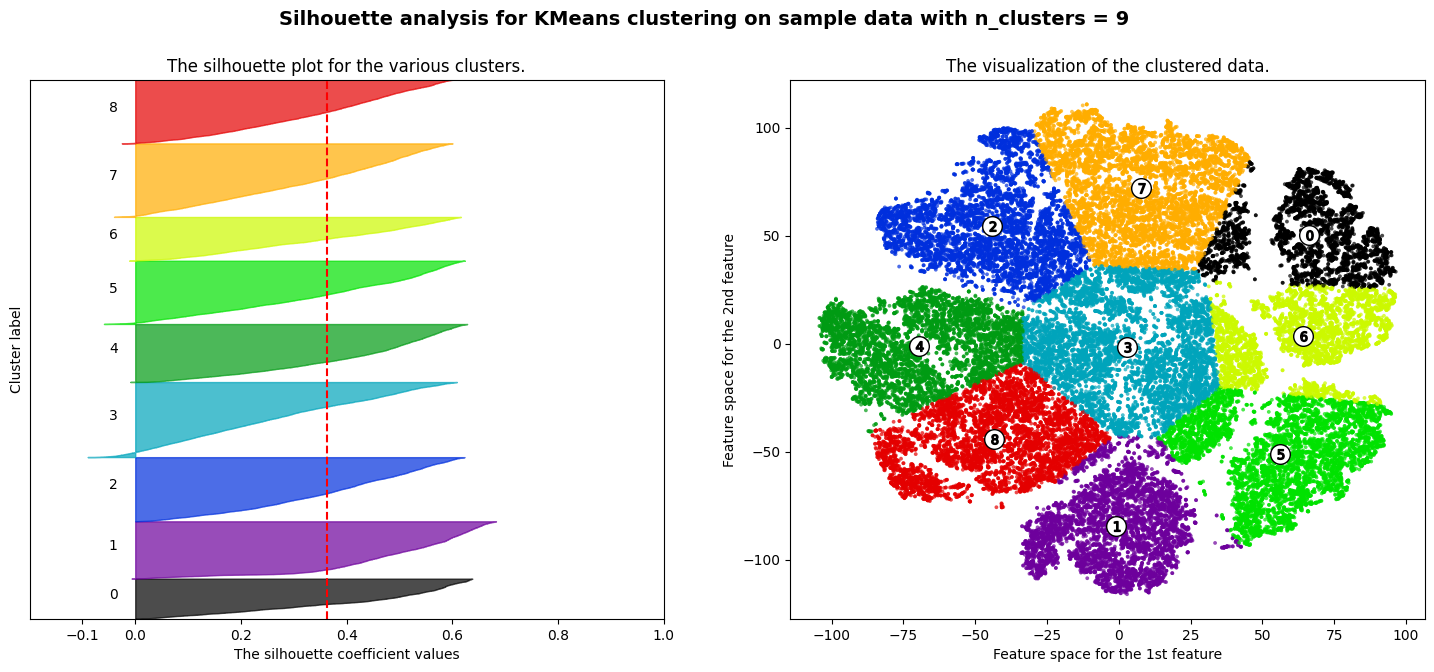

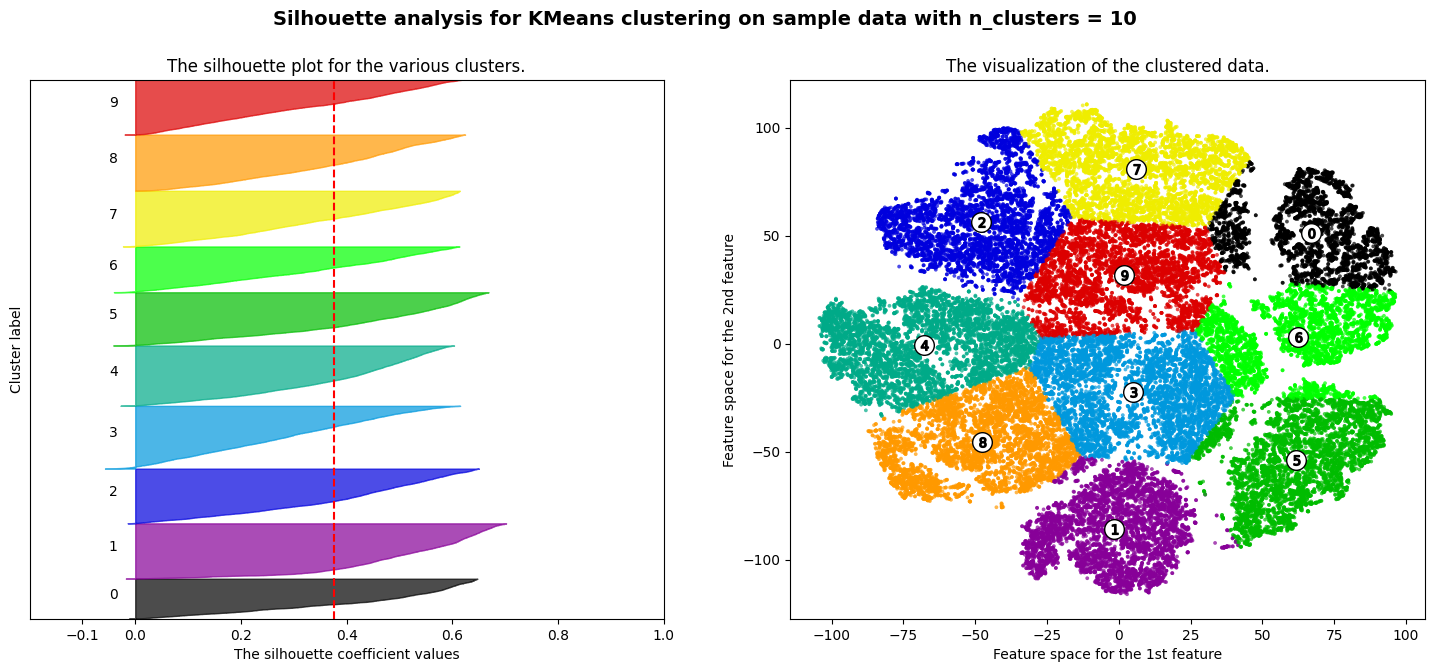

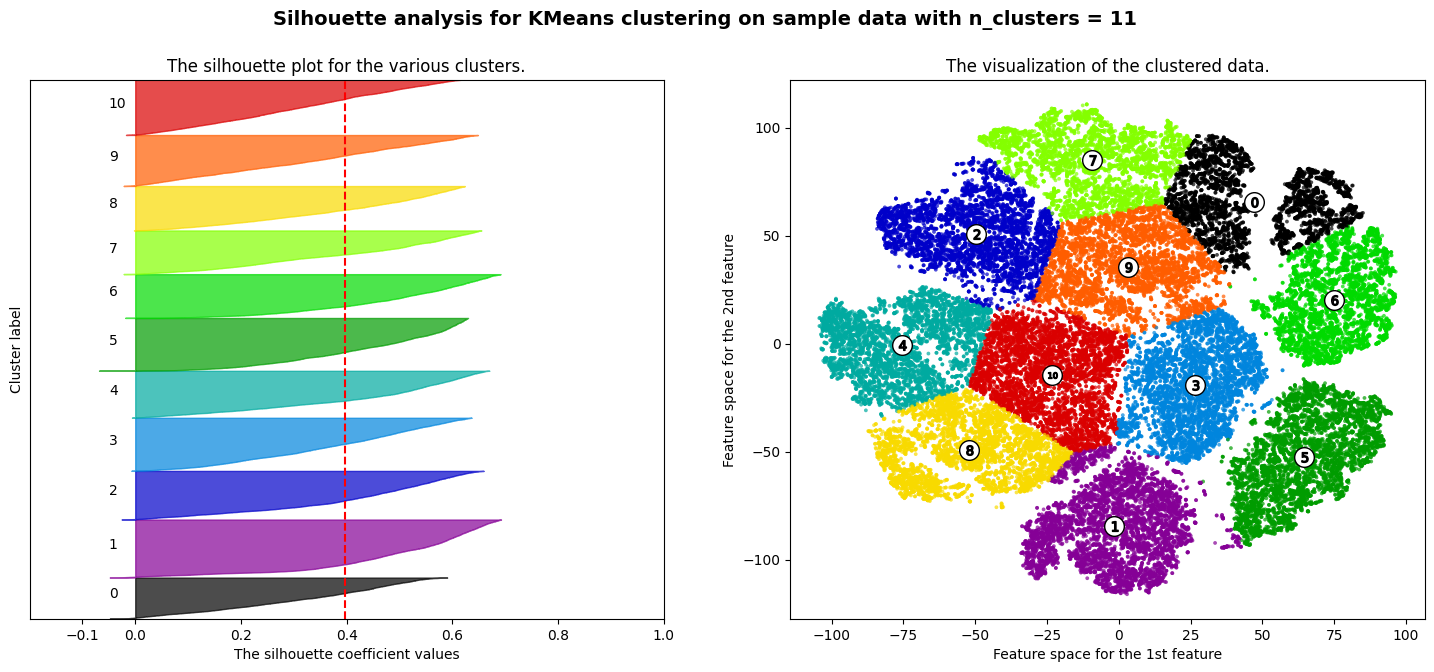

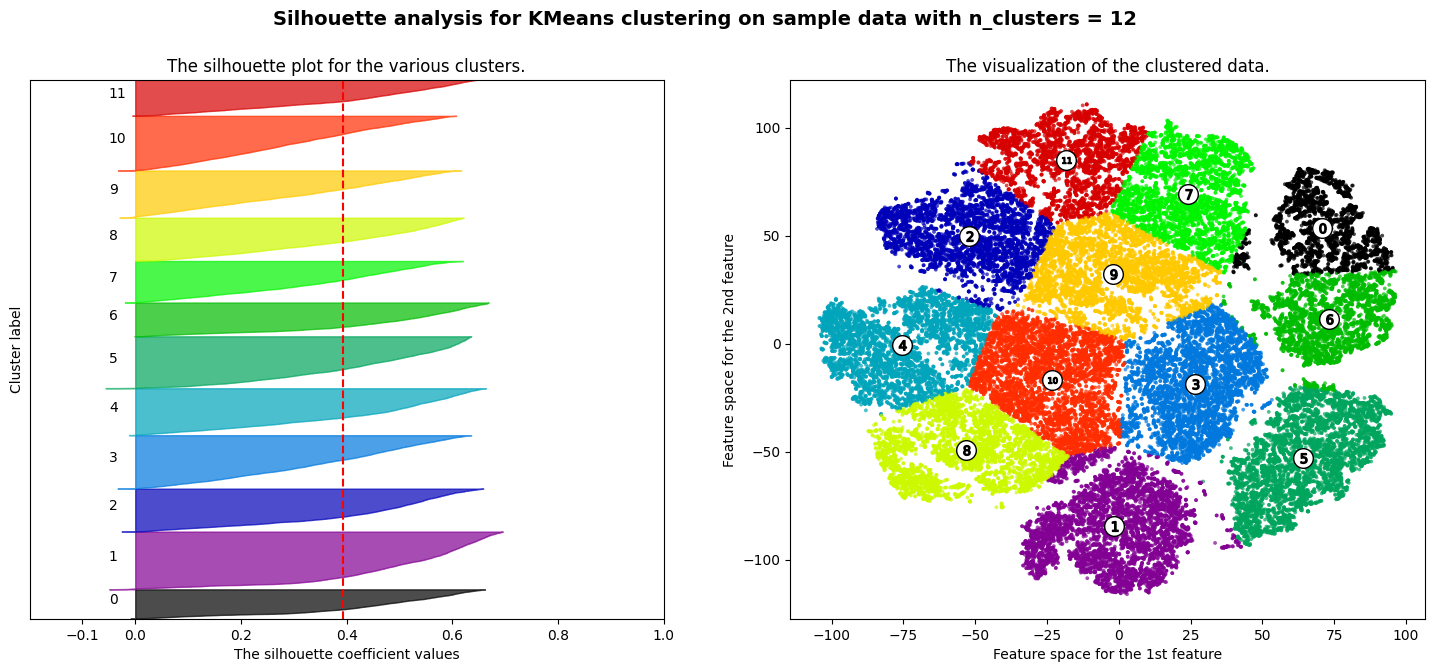

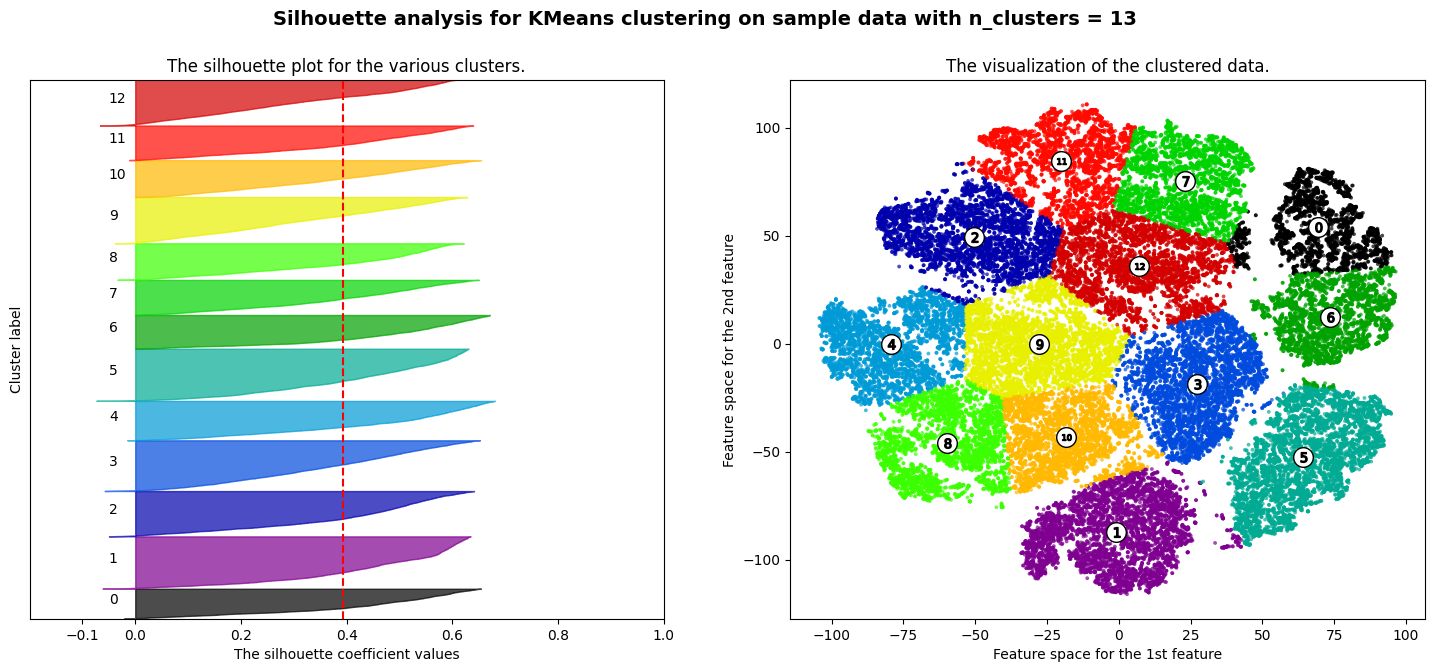

In [30]:
# Silhouette Method -- Average Score and plot


# Código adaptado de https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm


range_n_clusters = [5, 6, 7, 8, 9, 10, 11, 12, 13]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.2, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(reduced_df_pca_tsne) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_df_pca_tsne)

    silhouette_avg = silhouette_score(reduced_df_pca_tsne, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_df_pca_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        reduced_df_pca_tsne[:, 0], reduced_df_pca_tsne[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

(0.25 points) Train a different clustering algorithm from the [scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html) and compare its results with those of KMeans and the original data distribution.

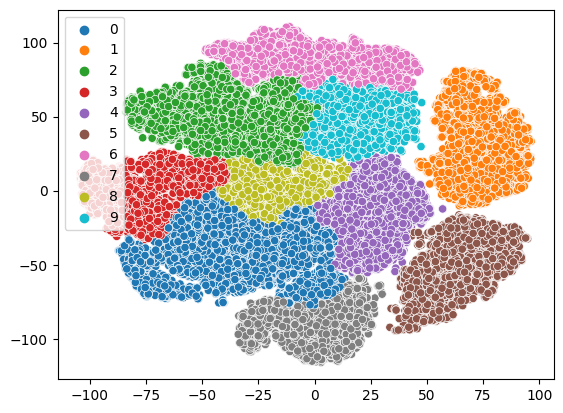

In [31]:
# TODO: Unsupervised Algorithm of your choose

from sklearn.cluster import Birch
spectral = Birch(n_clusters=10)
spectral.fit_predict(reduced_df_pca_tsne)

sns.scatterplot(
    x=reduced_df_pca_tsne[:,0], 
    y=reduced_df_pca_tsne[:,1], 
    hue=spectral.labels_, 
    palette=sns.color_palette()
    )

plt.show()

**(2 points) Questions:**

- Did KMeans provide good separation (clusters) when compared to the original distribution? Why?
- Did the Elbow and Silhouette methods suggest the same number of clusters? Did these techniques suggest the same n_cluster as the original dataset?
- If you did not know the number of classes in the MNIST dataset, which method would you use and why? Is the suggested number of clusters the same as the number of classes in the dataset? Why do you think it is the same or different?
- When compared to other algorithms, did KMeans perform better? How can different clustering techniques be compared?

O K-médias proporcionou uma divisão razoável das classes, quando comparado à distribuição original. Em regiões em que os pontos de uma mesma classe estavam mais agrupados e isolados dos demais pontos de outras classes, o K-Médias teve maior efetividade, isto é, foi capaz de encontrar uma separação semelhante à original. Porém, como pode ser visto mais ao centro dos gráficos em duas dimensões, há um grande aglomerado de pontos de classes distintas, sem uma divisão espacial muito clara entre eles. Assim, nessa região, o comportamento do K-Médias é imprevisível, pois o algoritmo dependerá consideravelmente de como os centróides são inicializados e, portanto, a separação encontrada está sujeita a esse fator aleatório e, com isso, na maior parte dos casos, não é tão parecida com a original.

Em relação aos métodos para escolha do número de clusters, ambos sugeriram um número próximo para a quantidade de clusters. A partir da análise do gráfico gerado pelo método do cotovelo, pode-se concluir que um valor razoável para ``` n_clusters ``` seria em torno de 9, que seria o ponto no gráfico a partir do qual a taxa de decrescimento da curva se torna aproximadamente constante. Já para o método da Silhueta, a métrica "average silhouette score" sugere o valor ``` n_clusters ``` = 11, uma vez que foi esse o que obteve a maior pontuação nessa métrica. Além disso, esse valor é confirmado considerando uma análise visual dos gráficos. Com isso, constata-se que ambos métodos sugeriram um número de clusters diferente do original do dataset. Porém, deve-se considerar uma certa incerteza em relação ao resultado dos métodos, dado que há uma certa subjetividade envolvida na análise dos gráficos.

Caso não soubesse o número de classes do dataset, é provável que fosse utilizado o método da Silhueta, pois ele oferece mais métricas para avaliar os resultados, podendo ser levado em conta, por exemplo, tanto a silhueta média, quanto o formato do gráfico gerado. Já o método do cotovelo apresenta uma solução mais simples e por vezes difícil de ser aplicada, uma vez que podem haver dificuldades em identificar visualmente em que ponto de fato está o "cotovelo" do gráfico. O número de clusters sugerido pelo método da silhueta foi diferente do valor de classes do dataset original, porém, essa diferença é de apenas uma unidade, o que pode ser considerado como parte da incerteza do método. Além disso, esse resultado diferente do esperado pode ser decorrente da distribuição dos pontos após a redução de dimensionalidade, sendo que a grande aglomeração de pontos, sem um distanciamento muito claro entre as classes pode aumentar a incerteza do resultado.

Por fim, cabe uma comparação entre o algoritmo KMeans com o outro algoritmo de agrupamento testado nesse trabalho, o BIRCH. A partir dos gráficos que representam a solução dos dois modelos para o dataset, pode-se dizer que os resultados são próximos. Apesar disso, o BIRCH perfoma um pouco melhor que o KMeans, isso acontece pois o BIRCH parece lidar melhor com agrupamentos mais isolados, tendo uma separação melhor para esses grupos, enquanto o KMeans, por utilizar apenas a distância ao centroide para o cálculo, não distingui tão bem esses grupos isolados. Apesar disso, para os valores mais centrais, apesar de diferentes, os 2 algoritmos parecem acertar uma quantidade equivalente de pontos, tendo os dois dificuldades em encontrar as "barreiras" que separam cada dígito.

## 3. Classification with PCA

PCA can be used in combination with a supervised learning model.

(0.25 points) Baseline Model: Understanding the machine learning pipeline, explore a supervised model with the MNIST dataset.

obs: *Remember to split and normalize the data*

In [41]:
# Baseline Model

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

def MSE(Y,H):
  e = (Y - H) ** 2
  e = np.sum(e)
  return e / Y.size

scaler = StandardScaler()
y_train = df['label']
X_train = df[df.columns.drop(['label'])]
# Scaler eh fittado somente com o conjunto de treinamento
X_train = scaler.fit_transform(X_train)

df_test = pd.read_csv('digit_recognizer_test.csv')
y_test = df_test['label']
X_test = df_test[df_test.columns.drop(['label'])]
X_test = scaler.transform(X_test)

scikit_model = SGDRegressor(random_state=10)
scikit_model.fit(X_train, y_train)
y_pred_train = scikit_model.predict(X_train)
y_pred_test = scikit_model.predict(X_test)

print(f"On training set: MSE = {round(MSE(y_train, y_pred_train),3)}")

print("(w0 = %2.3f" % scikit_model.intercept_, end = "")
for i in range(X_train.shape[1]):
    print(",\n w%d = %2.3f" % (i+1, scikit_model.coef_[i]), end = "")
print(")")


On training set: MSE = 2.736482277364718e+23
(w0 = 1624936643.576,
 w1 = 0.000,
 w2 = 0.000,
 w3 = 0.000,
 w4 = 0.000,
 w5 = 0.000,
 w6 = 0.000,
 w7 = 0.000,
 w8 = 0.000,
 w9 = 0.000,
 w10 = 0.000,
 w11 = 0.000,
 w12 = 0.000,
 w13 = -107849225978.762,
 w14 = -23450943325.879,
 w15 = 101369694919.572,
 w16 = 101369694919.572,
 w17 = 0.000,
 w18 = 0.000,
 w19 = 0.000,
 w20 = 0.000,
 w21 = 0.000,
 w22 = 0.000,
 w23 = 0.000,
 w24 = 0.000,
 w25 = 0.000,
 w26 = 0.000,
 w27 = 0.000,
 w28 = 0.000,
 w29 = 0.000,
 w30 = 0.000,
 w31 = 0.000,
 w32 = 0.000,
 w33 = -40425866814.380,
 w34 = 22775765954.292,
 w35 = -22265010699.785,
 w36 = 49628019932.670,
 w37 = 5903076680.135,
 w38 = -7059553075.662,
 w39 = -709019751.687,
 w40 = 1025791483.068,
 w41 = 740336380.282,
 w42 = 1404428713.869,
 w43 = 5474999849.094,
 w44 = -1237155123.446,
 w45 = -2361634206.462,
 w46 = 20585326267.532,
 w47 = 4457797973.497,
 w48 = -5953468773.593,
 w49 = -22861710407.554,
 w50 = 7704898204.793,
 w51 = 31956374857.110,

(0.5 points) PCA model: Redo the experiment with the inclusion of PCA. Plot the accuracy (or other classification metric) against ```n_components``` and analyze the model.

For n_components = 2. On validation set: MSE = 7.456
For n_components = 3. On validation set: MSE = 6.37
For n_components = 4. On validation set: MSE = 6.217
For n_components = 5. On validation set: MSE = 5.282
For n_components = 6. On validation set: MSE = 5.098
For n_components = 7. On validation set: MSE = 5.029
For n_components = 8. On validation set: MSE = 5.015
For n_components = 9. On validation set: MSE = 5.015
For n_components = 10. On validation set: MSE = 4.956
For n_components = 11. On validation set: MSE = 4.999
For n_components = 12. On validation set: MSE = 4.929
For n_components = 13. On validation set: MSE = 4.908
For n_components = 14. On validation set: MSE = 4.905
For n_components = 15. On validation set: MSE = 4.889
For n_components = 16. On validation set: MSE = 4.81
For n_components = 17. On validation set: MSE = 5.728
For n_components = 18. On validation set: MSE = 4.827
For n_components = 19. On validation set: MSE = 4.897
For n_components = 20. On validation s

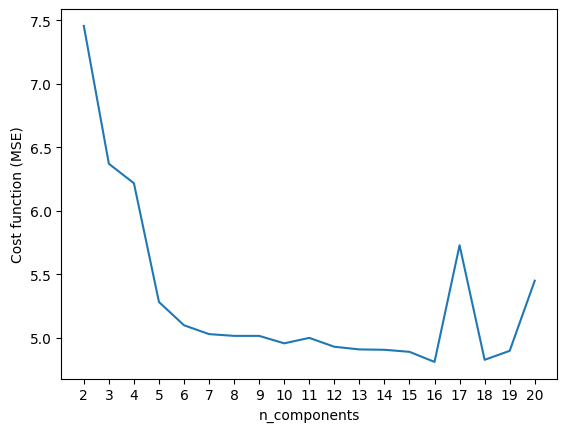

In [38]:
# Baseline Model with PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

n_components = [component for component in range(2, 21)]
MSE_results = []

X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = train_test_split(X_train, y_train, test_size=0.4, random_state=10)

best_n_components = None
best_mse = None

for n in n_components:
    pca = PCA(n_components=n, random_state=10)
    reduced_X_valid = pca.fit_transform(X_valid_pca)

    scikit_model = SGDRegressor(random_state=10)
    scikit_model.fit(reduced_X_valid, y_valid_pca)
    y_pred_pca = scikit_model.predict(reduced_X_valid)

    current_mse = MSE(y_valid_pca, y_pred_pca)
    MSE_results.append(current_mse)

    if best_mse == None or best_mse > current_mse:
        best_mse = current_mse
        best_n_components = n

    print(f"For n_components = {n}. On validation set: MSE = {round(current_mse,3)}")

pca = PCA(n_components=best_n_components, random_state=10)
reduced_X_train_pca = pca.fit_transform(X_train_pca)
scikit_model = SGDRegressor(random_state=10)
scikit_model.fit(reduced_X_train_pca, y_train_pca)
y_pred_pca = scikit_model.predict(reduced_X_train_pca)

print(f"Best model: n_components = {best_n_components}. On training set: MSE = {round(MSE(y_train_pca, y_pred_pca),3)}")    


plt.plot(n_components, MSE_results)
plt.ylabel("Cost function (MSE)")
plt.xlabel("n_components")
plt.xticks([_ for _ in range(2, 21)])
plt.yticks()
plt.show()


(0.25 points) Evaluate both the baseline model and the PCA model using the test set. Display the confusion matrices for both cases.

In [40]:
# Evaluation of the models in Test split

reduced_X_test = pca.transform(X_test)
y_pred_test_pca = scikit_model.predict(reduced_X_test)

print(f"On test set: MSE = {round(MSE(y_test, y_pred_test),3)}")

print(f"On test set: MSE = {round(MSE(y_test, y_pred_test_pca),3)}")

On test set: MSE = 2.495130779155307e+23
On test set: MSE = 4.611


**(2 points) Questions:**

- Which model was used? What was the best result achieved without using PCA?
- What are your conclusions about the Baseline model?
- How did you define the best model for both approaches?
- Did the accuracy improve when using the PCA model?
- What are the advantages and disadvantages of using PCA on this dataset?


O modelo utilizado como baseline foi uma regressão linear, utilizando o algoritmo de gradiente descendente estocástico (SGDRegressor). O melhor resultado utilizando esse modelo, sem redução de dimensionalidade, gerou um erro quadrático médio (MSE) de $2.74\times 10^{23}$. Portanto, vê-se que a regressão linear não é capaz de descrever os dados do MNIST de forma coerente, quando aplicada diretamente nos dados sem um tratamento prévio do vetor de features. Além disso, pode ser observado que os valores gerados para os pesos $w_i$ da regressão linear sem redução de dimensionalidade não são nada consistentes, havendo muitas features com peso 0, enquanto outras recebem pesos consideravelmente altos.

Nessa primeira abordagem, não houve um grande tratamento para definir o melhor modelo. Porém, para a segunda abordagem, foi realizada uma validação para definição de hiperparâmetros.

Combinando o modelo com a redução de dimensionalidade por PCA, os resultados foram substancialmente melhores. Foram testados diversos valores de dimensões diferentes, objetivando-se obter o melhor valor para o hiperparâmetro ``` n_components ```, utilizando o conjunto de validação e, por fim, foi treinado o modelo com o valor de ``` n_components ``` que proporcionou o melhor resultado na validação. Assim, foi realizada uma redução para 16 dimensões e o modelo resultante apresentou um MSE no conjunto de treinamento de $4.85$ e MSE no conjunto de teste de $4.611$. Ou seja, a melhora no erro quadrático médio foi extramamente notável.

Assim, pode ser feita uma análise das vantagens e desvantagens do uso de uma redução por PCA nesse dataset. Por um lado, a sua utilização resulta numa perda de informações dos dados. Por exemplo, o uso do PCA não leva em consideração as não linearidades do modelo. Apesar disso, o PCA traz uma grande simplificação do dataset, o que no caso do modelo de regressão linear aplicado, se mostra extremamente positivo, pois resulta numa distribuição mais equilibrada dos pesos finais, não havendo mais uma quantidade tão grande de features com peso nulo, ou outras com pesos muito elevados.

## Deadline

Wednesday, May 22, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May 23, 11:59 pm : grade * 0.75
- May 24, 11:59 pm : grade * 0.5
- May 25, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**